#1. Modelo Base vs. Modelo Monty Hall
##1.1

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def pr(r):
  return 1/3 #para todas las hipotesis devuelvo 1/3

def pc(c):
  return 1/3

def ps_rM0(s,r): #proba de s dado r del modelo M0
  return (s != r) * 1/2 #1/2 o 0 segun verdad del (...)

def ps_rcM1(s,r,c):
  if r != c:
    return (s != r) * (c != s) * 1
  else:
    return (s != r) * 1/2

In [ ]:
def prcs_M(r,c,s,m):  #proba conjunta
  if m == 0:
    return pr(r)*pc(c)*ps_rM0(s,r)
  if m == 1:
    return pr(r)*pc(c)*ps_rcM1(s,r,c)

##1.2

In [ ]:
#c y m estan fijos. tengo que recorrer todos los otros valores dejandolos fijos.
H = np.arange(3) #posibles valores de las hipotesis

def ps_cM(s,c,m): #posterior de s dado c P(s|c,M)=P(s,c|M)/P(c|M); P(s,c|M) es marginal de la conjunta
  num = 0 #P(s,c|M) = sum_r P(r,c,s|M)
  den = 0  #P(c|M)= sum_{r,s} P(r,c,s|M)
  for hr in H:
    num += prcs_M(hr,c,s,m)
    for hs in H:
      den += prcs_M(hr,c,hs,m)
  return num/den


def pr_csM(r,c,s,m): #P(r|c,s,M) = P(r,c,s|M)/P(c,s|M)
  num = prcs_M(r,c,s,m) #P(r,c,s|M)
  den = 0 #P(c,s|M) = sum_r P(r,c,s|M)
  for hr in H:
    den += prcs_M(hr,c,s,m)
  return num/den


Tenemos las predicciones. Ahora multipliquemos las tres para tener la proba de un episodio.

In [ ]:
def pEpisodio_M(c,s,r,m):
  return prcs_M(r,c,s,m)
  #return pc(c)*ps_cM(s,c,m)*pr_csM(r,c,s,m)

Probemos...

In [ ]:
pEpisodio_M(c=1,s=2,r=1,m=1)


0.05555555555555555

In [ ]:
prcs_M(c=1,s=2,r=1,m=1)

0.05555555555555555

Da lo mismo efectivamente.

##1.3


In [ ]:
def simular(T=16,seed=0):
  np.random.seed(seed)
  Datos = []
  for t in range(T):
    r = np.random.choice(3, p = [pr(hr) for hr in H])
    c = np.random.choice(3, p = [pc(hc) for hc in H])
    s = np.random.choice(3, p = [ps_rcM1(hs,r,c) for hs in H]) #ps_rcM1(s,r,c)
    Datos.append((c,s,r))
  return Datos

In [ ]:
T = 16
Datos = simular(T)
print(Datos)

[(2, 0, 1), (1, 2, 1), (2, 0, 1), (2, 0, 1), (2, 0, 1), (0, 2, 0), (2, 1, 2), (1, 0, 2), (1, 2, 0), (1, 0, 2), (2, 1, 0), (0, 2, 1), (1, 2, 1), (1, 0, 2), (0, 1, 2), (0, 1, 2)]


##1.4

Aquí realizo el producto de cada prediccion por episodio (serían episodios independientes)

In [ ]:
def secuencia_de_predicciones(Datos,m):
  pDatos_M = [1]
  for t in range(len(Datos)):
    c,s,r = Datos[t]
    pDatos_M.append(pEpisodio_M(c,s,r,m))
  return pDatos_M

In [ ]:
pDatos_M0 = np.prod(secuencia_de_predicciones(Datos,m = 0))
pDatos_M1 = np.prod(secuencia_de_predicciones(Datos,m = 1))
print("Proba del modelo base:", pDatos_M0)
print("Proba de Monty Hall:", pDatos_M1)

Proba del modelo base: 8.234550899283273e-21
Proba de Monty Hall: 3.372872048346429e-17


La de Monty Hall es más alta.

##1.5
###1.5.1

In [ ]:
log_bayes_factor = np.log10(pDatos_M1/pDatos_M0)

print("Log Bayes Factor:", log_bayes_factor)
print("El modelo 1 preserva", 10**log_bayes_factor, "veces más creencia")

Log Bayes Factor: 3.612359947967774
El modelo 1 preserva 4095.999999999998 veces más creencia


###1.5.2


In [ ]:
N = T * 3

log10_predicciones_M0 = np.log10(secuencia_de_predicciones(Datos, m=0))
log10_predicciones_M1 = np.log10(secuencia_de_predicciones(Datos, m=1))

media_geometrica_M0 = 10 ** (np.sum(log10_predicciones_M0) / N)
media_geometrica_M1 = 10 ** (np.sum(log10_predicciones_M1) / N)

print("Media geometrica base:", media_geometrica_M0)
print("Media geometrica Monty Hall:", media_geometrica_M1)

Media geometrica base: 0.38157141418444396
Media geometrica Monty Hall: 0.45376744062979096


##1.6

In [ ]:
pDatos = (pDatos_M0 * 0.5) + (pDatos_M1 * 0.5)
print(pDatos)


1.6868477517181785e-17


##1.7

In [ ]:
pM0_Datos = pDatos_M0 * 0.5 / pDatos
pM1_Datos = pDatos_M1 * 0.5 / pDatos

print("Proba de modelo base:", pM0_Datos)
print("Proba de modelo Monty Hall:", pM1_Datos)

Proba de modelo base: 0.000244081034903588
Proba de modelo Monty Hall: 0.9997559189650964


Tiene sentido que el de Monty Hall de casi 1 ya que los episodios los generamos con ese modelo.

##1.8

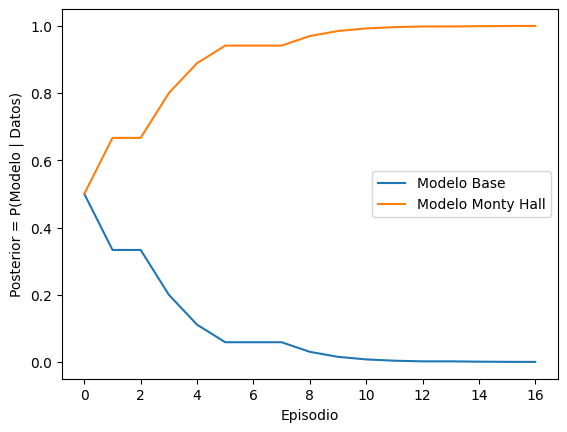

[0.5, 0.3333333333333333, 0.3333333333333333, 0.19999999999999998, 0.11111111111111112, 0.058823529411764705, 0.05882352941176471, 0.058823529411764705, 0.030303030303030304, 0.015384615384615385, 0.007751937984496124, 0.0038910505836575876, 0.0019493177387914231, 0.001949317738791423, 0.000975609756097561, 0.0004880429477794046, 0.000244081034903588]


In [ ]:
p_M0 = 0.5
p_M1 = 0.5

posterior_M0 = [0.5]
posterior_M1 = [0.5]

pDatos_M0 = 1
pDatos_M1 = 1


for t in range(T):
  c, s, r = Datos[t]
  # proba de los episodios segun cada modelo
  pDatos_M0 *= pEpisodio_M(c, s, r, m=0)
  pDatos_M1 *= pEpisodio_M(c, s, r, m=1)
  # proba datos con proba total
  pDatos = (pDatos_M0 * p_M0) + (pDatos_M1 * p_M1)
  # agrego las posteriores al vector
  posterior_M0.append(pDatos_M0 * p_M0 / pDatos)
  posterior_M1.append(pDatos_M1 * p_M1 / pDatos)


plt.plot(range(T+1), posterior_M0, label='Modelo Base')
plt.plot(range(T+1), posterior_M1, label='Modelo Monty Hall')
plt.xlabel('Episodio')
plt.ylabel('Posterior = P(Modelo | Datos)')
plt.legend()
plt.show()


print(posterior_M0)

##1.9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Inferencia Bayesiana Causal/Practicas/Practica 1/NoMontyHall.csv'

with open(file_path, 'r') as file:
  noMontyHall = file.read()

In [ ]:
def pa_p(a, p):
    if a == 0:
        return 1 - p
    elif a == 1:
        return p
    else:
        return 0

# inicializo las probabilidades de p de manera uniforme
Hp = np.arange(0, 1.1, 0.1)
Ha = [0, 1]
pp_Datos = [1/11 for i in range(11)]

def prcsap_M2(r, c, s, a, ip):  # probabilidad conjunta
    return pr(r) * pc(c) * ps_rM0(s, r) ** (1 - a) * ps_rcM1(s, r, c) ** a * pa_p(a, Hp[ip]) * pp_Datos[ip]

def pEpisodio_M2(c, s, r):
    res = 0
    for a in Ha:
        for ip in range(len(Hp)):
            res += prcsap_M2(r, c, s, a, ip)
    return res

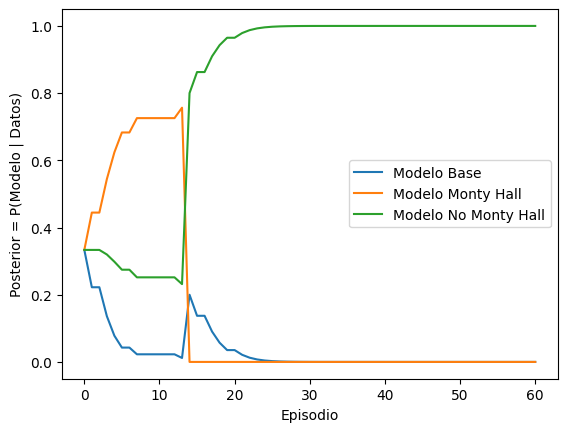

In [ ]:
# inicializo de las probabilidades y posteriores
p_M0 = p_M1 = p_M2 = 1/3
posterior_M0 = [p_M0]
posterior_M1 = [p_M1]
posterior_M2 = [p_M2]

pDatos_M0 = pDatos_M1 = pDatos_M2 = 1


lines = noMontyHall.strip().split('\n')[1:]

for i, line in enumerate(lines[:60]): # itero por indice y por line los primeros 60 datos
    c, s, r = map(int, line.split(','))

    # proba de los episodios segun cada modelo
    pDatos_M0 *= pEpisodio_M(c, s, r, m=0)
    pDatos_M1 *= pEpisodio_M(c, s, r, m=1)
    pDatos_M2 *= pEpisodio_M2(c, s, r)

    # proba datos con proba total
    pDatos = (pDatos_M0 * p_M0) + (pDatos_M1 * p_M1) + (pDatos_M2 * p_M2)

    # agrego las posteriores al vector
    posterior_M0.append(pDatos_M0 * p_M0 / pDatos)
    posterior_M1.append(pDatos_M1 * p_M1 / pDatos)
    posterior_M2.append(pDatos_M2 * p_M2 / pDatos)

    # actualizo pp_Datos con nuevos datos
    new_pp_Datos = []
    for ip, p in enumerate(Hp):
        suma_prob = 0
        for a in Ha:
            suma_prob += prcsap_M2(r, c, s, a, ip)
        new_pp_Datos.append(suma_prob)

    # normalizo las nuevas probabilidades de p (porque discreticé)
    suma_total = sum(new_pp_Datos)
    pp_Datos = [prob / suma_total for prob in new_pp_Datos]



plt.plot(range(len(posterior_M0)), posterior_M0, label='Modelo Base')
plt.plot(range(len(posterior_M1)), posterior_M1, label='Modelo Monty Hall')
plt.plot(range(len(posterior_M2)), posterior_M2, label='Modelo No Monty Hall')
plt.xlabel('Episodio')
plt.ylabel('Posterior = P(Modelo | Datos)')
plt.legend()
plt.show()

#4. Efecto causal del sexo biológico sobre la altura.




     dfghhddh

##4.1

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/Inferencia Bayesiana Causal/Practicas/Practica 1/alturas.csv'

alturas = pd.read_csv(file_path)
print(alturas.head())


   id  altura sexo contextura_madre  altura_madre
0   1   172.7    M          mediana         159.8
1   2   171.5    M          mediana         160.3
2   3   162.6    F          mediana         160.5
3   4   174.1    M          mediana         159.8
4   5   168.3    M          mediana         158.3


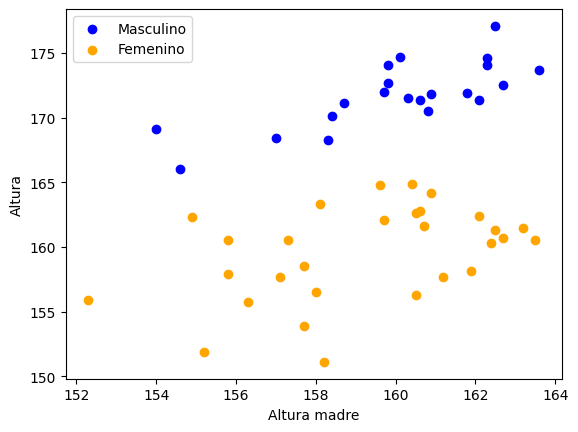

In [ ]:
masc = alturas[alturas['sexo'] == 'M']
fem = alturas[alturas['sexo'] == 'F']

plt.scatter(masc['altura_madre'], masc['altura'], label='Masculino', color = 'blue')
plt.scatter(fem['altura_madre'], fem['altura'], label='Femenino', color = 'orange')
plt.xlabel('Altura madre')
plt.ylabel('Altura')
plt.legend()
plt.show()

## 4.2

In [ ]:
altura = alturas['altura'].values
altura_madre = alturas['altura_madre'].values
sexo = alturas['sexo'].values
id_persona = alturas['id'].values

sexo_femenino = np.where(sexo == 'F', 1, 0)

max_id = id_persona.max()
grupo_azar = id_persona % (max_id // 2)

In [ ]:
Y = altura  # vector de alturas

# modelo base
X_base = np.vstack((np.ones(len(altura_madre)), altura_madre)).T  # matriz con intercept y altura_madre
# calcular los coeficientes usando la fórmula de la regresión lineal
# beta = (X.T * X)^(-1) * X.T * Y
beta_base = np.linalg.inv(X_base.T @ X_base) @ X_base.T @ Y


# modelo biologico
X_biologico = np.vstack((np.ones(len(altura_madre)), altura_madre, sexo_femenino)).T  # intercept, altura_madre, sexo_femenino
# calcular los coeficientes
beta_biologico = np.linalg.inv(X_biologico.T @ X_biologico) @ X_biologico.T @ Y


# modelo azar
X_azar = np.vstack((np.ones(len(altura_madre)), altura_madre, grupo_azar)).T # intercept, altura_madre, grupo_azar
# calcular los coeficientes
beta_azar = np.linalg.inv(X_azar.T @ X_azar) @ X_azar.T @ Y

##4.3

Copio lo del profe (ModeloLineal.py)

In [ ]:
import random
import numpy as np
from numpy.random import normal as noise
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as normal
from scipy.stats import norm
import statsmodels.api as sm
import copy
#phi = polynomial_basis_function

random.seed(1)
np.random.seed(1)
cmap = plt.get_cmap("tab10")


BETA = (1/0.2)**2
ALPHA = (10e-6) # Bishop usa alpha = 5e-3


def posterior(t, Phi, alpha = ALPHA, beta = BETA):
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)
    return m_N, S_N

def likelihood(w, t, Phi, beta = BETA):
    res = 1
    for i in range(len(t)):
        mean = w.T.dot(Phi[i])
        sigma = np.sqrt(beta**(-1))
        res =  res * norm.pdf(t[i],mean,sigma)
    return res

def moments_predictive(Phi_posteriori, alpha = ALPHA, beta = BETA, t_priori=None, Phi_priori=None):
    N, D = Phi_posteriori.shape
    if t_priori is None: t_priori, Phi_priori = np.zeros((0,1)), np.zeros((0,D))
    m_prior, S_prior = posterior(t_priori, Phi_priori, alpha, beta)
    Phi_posteriori.dot(S_prior.dot(Phi_posteriori.T))
    sigma2 = Phi_posteriori.dot(S_prior.dot(Phi_posteriori.T)) + (1/beta)*np.eye(Phi_posteriori.shape[0])
    mu = Phi_posteriori.dot(m_prior) # m_N.T.dot(Phi)
    return mu, sigma2

def predictive(t_posteriori, Phi_posteriori, alpha = ALPHA, beta = BETA, t_priori=None, Phi_priori=None):
    m, S = moments_predictive(Phi_posteriori, alpha, beta, t_priori, Phi_priori)
    return normal.pdf(t_posteriori.ravel(),m.ravel(),S)

def log_evidence(t, Phi, alpha = ALPHA, beta = BETA):
    N, M = Phi.shape
    m_N, S_N = posterior(t, Phi, alpha, beta)
    #m_N == beta*S_N.dot(Phi.T).dot(t)
    A = np.linalg.inv(S_N)
    A_det = np.linalg.det(A)
    E_mN = (beta/2) * (t - Phi.dot(m_N)).T.dot(t - Phi.dot(m_N)) \
         + (alpha/2) * m_N.T.dot(m_N)
    res = (M/2) * np.log(alpha)   \
        + (N/2) * np.log(beta)    \
        - E_mN                    \
        - (1/2) * np.log(A_det)   \
        - (N/2) * np.log(2*np.pi)
    return res

def sinus_model(X, variance):
    '''Sinus function plus noise'''
    return np.sin(2 * np.pi * X) + noise(0,np.sqrt(variance),X.shape)

def polynomial_basis_function(x, degree=1):
    return x ** degree

In [ ]:
coef_base = posterior(Y, X_base) # Media del maximo a posteriori
coef_biologico = posterior(Y, X_biologico)
coef_identitario = posterior(Y, X_azar)

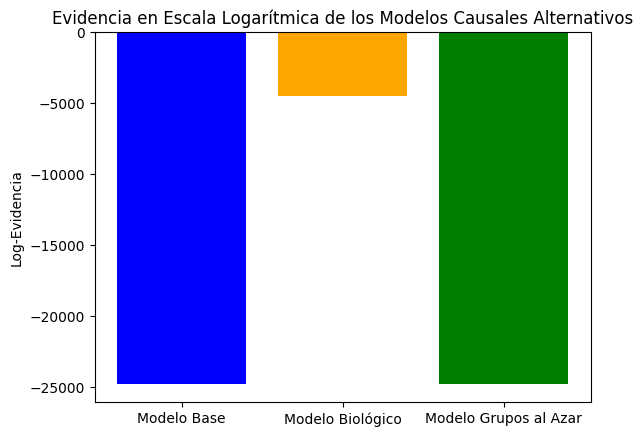

In [ ]:
log_evidencia_base = log_evidence(Y, X_base)
log_evidencia_biologico = log_evidence(Y, X_biologico)
log_evidencia_azar = log_evidence(Y, X_azar)

evidencias = [log_evidencia_base, log_evidencia_biologico, log_evidencia_azar]
modelos = ['Modelo Base', 'Modelo Biológico', 'Modelo Grupos al Azar']

plt.bar(range(len(evidencias)), evidencias, color=['blue', 'orange', 'green'])
plt.xticks(range(len(evidencias)), modelos)
plt.ylabel('Log-Evidencia')
plt.title('Evidencia en Escala Logarítmica de los Modelos Causales Alternativos')
plt.show()

##4.4


In [ ]:
def media_geometrica(w, t, Phi, beta = BETA):
    # proba de los datos segun el modelo
    producto_verosimilitud = likelihood(w, t, Phi, beta=BETA )

    # Media geométrica
    media_geo = producto_verosimilitud**(1/N)
    return media_geo

In [ ]:
media_geo_base = media_geometrica(coef_base[0], Y, X_base)
media_geo_biologico = media_geometrica(coef_biologico[0], Y, X_biologico)
media_geo_azar = media_geometrica(coef_identitario[0],Y, X_azar)

print("Media geométrica - Modelo Base:", media_geo_base)
print("Media geométrica - Modelo Biológico:", media_geo_biologico)
print("Media geométrica - Modelo Azar:", media_geo_azar)

Media geométrica - Modelo Base: 0.0
Media geométrica - Modelo Biológico: 0.0
Media geométrica - Modelo Azar: 0.0


## 4.5

In [ ]:
print(likelihood(coef_base[0], Y, X_base))
print(likelihood(coef_biologico[0], Y, X_biologico))
print(likelihood(coef_identitario[0], Y, X_azar))

0.0
0.0
0.0


No sé por qué dan 0 las likelihoods

In [ ]:
P_modelo_base = 1/3
P_modelo_biologico = 1/3
P_modelo_azar = 1/3


P_datos_base = likelihood(coef_base[0], Y, X_base)
P_datos_biologico = likelihood(coef_biologico[0], Y, X_biologico)
P_datos_azar = likelihood(coef_identitario[0], Y, X_azar)


P_datos = (P_datos_base * P_modelo_base + P_datos_biologico * P_modelo_biologico + P_datos_azar * P_modelo_azar)

posterior_base = (P_datos_base * P_modelo_base) / P_datos
posterior_biologico = (P_datos_biologico * P_modelo_biologico) / P_datos
posterior_azar = (P_datos_azar * P_modelo_azar) / P_datos

print("Posterior - Modelo Base:", posterior_base)
print("Posterior - Modelo Biológico:", posterior_biologico)
print("Posterior - Modelo Azar:", posterior_azar)


Posterior - Modelo Base: nan
Posterior - Modelo Biológico: nan
Posterior - Modelo Azar: nan


<ipython-input-90-30564a7febea>:16: RuntimeWarning: invalid value encountered in scalar divide
  posterior_base = (P_datos_base * P_modelo_base) / P_datos
<ipython-input-90-30564a7febea>:17: RuntimeWarning: invalid value encountered in scalar divide
  posterior_biologico = (P_datos_biologico * P_modelo_biologico) / P_datos
<ipython-input-90-30564a7febea>:18: RuntimeWarning: invalid value encountered in scalar divide
  posterior_azar = (P_datos_azar * P_modelo_azar) / P_datos
